# Project Demo

In [1]:
import random

import numpy as np

from source.portfolio import Portfolio
from source.utils import calc_var
from source.utils import calc_es

In [2]:
random.seed(42)

### Initialize portfolio

In [3]:
portfolio = Portfolio(
    start_date='2023-12-02',
    investing_amounts={
        'bonds': 10e6,  # 5 bonds
        'stocks': 1e6,  # 10 stocks
        'fx': 100e6,  # 2 currency pairs
    },
    max_relative_error=0.1,  # 10% deviation from target weight 
)

In [4]:
print(f'Total portfolio size: {portfolio.total_amount // 1e6} mln')

Total portfolio size: 260.0 mln


In [5]:
np.isclose(
    portfolio.target_weights['bonds'] * 5
    + portfolio.target_weights['stocks'] * 10
    + portfolio.target_weights['fx'] * 2,
    1
)

True

In [6]:
portfolio.get_last_price('GAZP')

162.61

### Rebalance portfolio

In [7]:
portfolio.all_instruments

{'bonds': {'SU26218RMFS6': 0,
  'SU26221RMFS0': 0,
  'SU26222RMFS8': 0,
  'SU26224RMFS4': 0,
  'SU26230RMFS1': 0},
 'stocks': {'GAZP': 0,
  'GMKN': 0,
  'LKOH': 0,
  'MAGN': 0,
  'MGNT': 0,
  'MOEX': 0,
  'ROSN': 0,
  'RUAL': 0,
  'SBER': 0,
  'VTBR': 0},
 'fx': {'USD_RUB': 0, 'EUR_RUB': 0}}

In [8]:
portfolio.is_rebalancing_needed()

True

In [9]:
portfolio.rebalance_portfolio()

In [10]:
portfolio.all_instruments

{'bonds': {'SU26218RMFS6': 1180,
  'SU26221RMFS0': 1278,
  'SU26222RMFS8': 1042,
  'SU26224RMFS4': 1213,
  'SU26230RMFS1': 1382},
 'stocks': {'GAZP': 6149,
  'GMKN': 6007,
  'LKOH': 139,
  'MAGN': 19790,
  'MGNT': 156,
  'MOEX': 5027,
  'ROSN': 1738,
  'RUAL': 27207,
  'SBER': 3650,
  'VTBR': 42354934},
 'fx': {'USD_RUB': 1128898.79, 'EUR_RUB': 1032176.02}}

### Simulations

In [11]:
simulations = portfolio.risk_factors.simulate_all(n_days=10, n_sim=100)

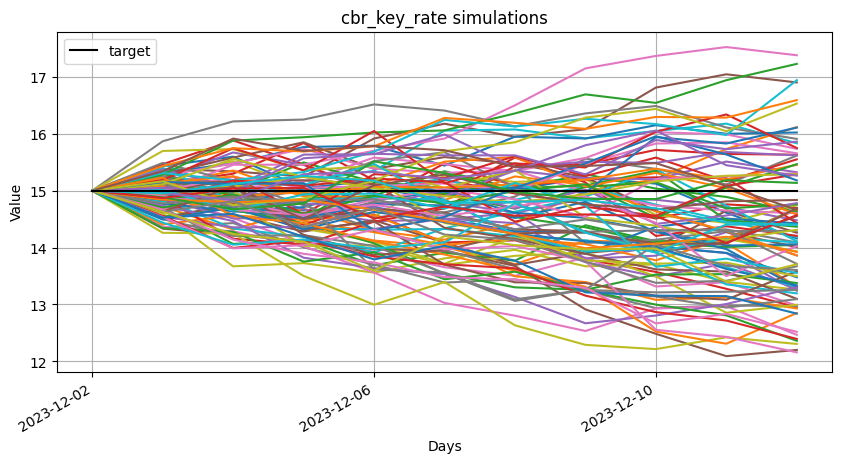

In [12]:
portfolio.risk_factors.plot_simulations(
    simulations=simulations,
    risk_factor='cbr_key_rate',
)

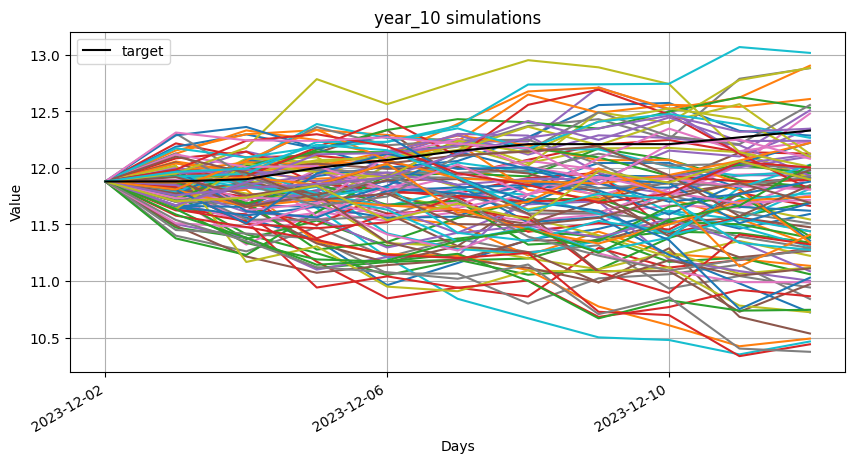

In [13]:
portfolio.risk_factors.plot_simulations(
    simulations=simulations,
    risk_factor='year_10',
)

### Fair value risk metrics

1 day prediction

In [14]:
fvalue_dist = portfolio.simulate_fair_value_dist(
    n_days=1,
    n_sim=1_000,
)

In [15]:
level = 99
var = calc_var(fvalue_dist, level=level)
print(f"VaR {level}%: {var:_.2f}")

VaR 99%: 419_632_069_313.87


In [16]:
level = 97.5
es = calc_es(fvalue_dist, level=level)
print(f"Expected Shortfall {level}%: {es:_.2f}")

Expected Shortfall 97.5%: 215_649_656_784.70


10 days prediction

In [17]:
fvalue_dist = portfolio.simulate_fair_value_dist(
    n_days=10,
    n_sim=1_000,
)

In [18]:
level = 99
var = calc_var(fvalue_dist, level=level)
print(f"VaR {level}%: {var:_.2f}")

VaR 99%: 415_016_779_694.43


In [19]:
level = 97.5
es = calc_es(fvalue_dist, level=level)
print(f"Expected Shortfall {level}%: {es:_.2f}")

Expected Shortfall 97.5%: 206_509_133_736.89
